In [ ]:
pip install yfinance neuralprophet

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import yfinance as yf


In [11]:
stock_symbol = 'NVDA'
start_date = '2015-01-01'
end_date = '2024-01-01'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2015-01-02  5.0325  5.0700  4.9525  5.0325   4.832806  11368000
2015-01-05  5.0325  5.0475  4.9250  4.9475   4.751179  19795200
2015-01-06  4.9550  4.9600  4.7925  4.7975   4.607130  19776400
2015-01-07  4.8325  4.8750  4.7700  4.7850   4.595127  32180800
2015-01-08  4.8400  4.9950  4.8375  4.9650   4.767986  28378000


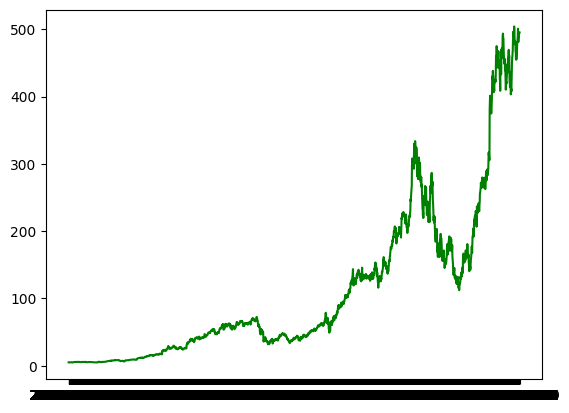

In [12]:
stocks = pd.read_csv('stock_data.csv')
stocks['Data'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]

stocks.columns= ['ds', 'y']


plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

In [13]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 90
WARNING - (NP.config.set_lr_fin

Epoch 90: 100%|██████████| 90/90 [00:00<00:00, 841.12it/s, loss=0.0194, v_num=16, MAE=27.80, RMSE=45.40, Loss=0.0191, RegLoss=0.000]  


,MAE,RMSE,Loss,RegLoss,epoch
0,758.301392,839.297485,1.241150,0.0,0
1,572.797363,658.220520,0.897361,0.0,1
2,393.728821,479.247406,0.572079,0.0,2
3,252.751846,318.858215,0.321665,0.0,3
4,150.829498,192.342834,0.150505,0.0,4
...,...,...,...,...,...
85,27.593193,45.153912,0.018983,0.0,85
86,27.612843,45.636845,0.019142,0.0,86
87,27.716230,45.292156,0.018941,0.0,87
88,27.933781,45.691666,0.019179,0.0,88


f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - De

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.12it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetim


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 375.05it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


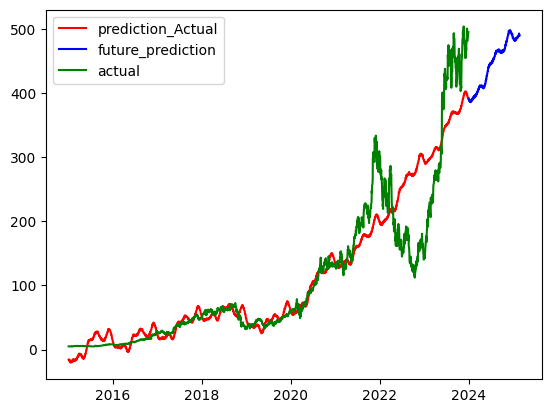

In [14]:
future = model.make_future_dataframe(stocks, periods = 300)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)
actual_prediction['ds'] = pd.to_datetime(actual_prediction['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])
stocks['ds'] = pd.to_datetime(stocks['ds'])

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_Actual', c='r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c='b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.show()

In [16]:
model.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
f:\trend_prediction\prediction\lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

f:\trend_prediction\prediction\lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

